# 画像のFew-Shot

システムメッセージでのFew-Shotはテキストしか対応していないため、メッセージの履歴を使ってサンプルを与える。
このサンプルの実行はGPT-4Vモデルが必要です。

In [1]:
!python -m pip install openai
!python -m pip install python-dotenv
!python -m pip install pillow
import json
from openai import AzureOpenAI
from dotenv import load_dotenv
from PIL import Image
import os
import base64

In [2]:
load_dotenv()
deployment = os.environ['DEPLOYMENT']
apikey = os.environ['API_KEY']
base = os.environ['BASE']
api_version=os.environ['API_VERSION']

In [3]:
client = AzureOpenAI(
  azure_endpoint = base, 
  api_key=apikey,  
  api_version=api_version
)

# 対象画像

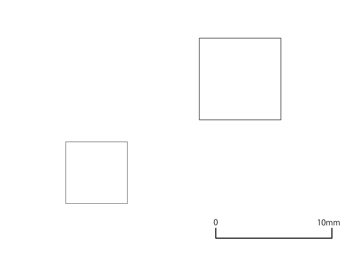

In [5]:
target_filename = "FewShotVisionImage/target2.png"
img = Image.open(target_filename)
img.resize((img.width//3, img.height//3))

# Few-Shot無しで呼び出し

In [6]:
with open(target_filename,"rb") as imagefile:
    target_b64_string = base64.b64encode(imagefile.read()).decode('utf-8')

In [7]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。正方形の辺の長さを右下のスケールから推測してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{target_b64_string}"}}
          ]
        }
    ],
    max_tokens=600,
    temperature=0
)

answer = response.choices[0].message.content
print(answer)

この画像には、2つの正方形が描かれています。右下にはスケールがあり、0から10mmまでの長さが示されています。正方形の辺の長さを導出するためには、スケールを使用して正方形の辺を測定する必要があります。しかし、画像からは正確な測定ができないため、正方形の辺の長さを正確に導出することはできません。実際には、物理的な定規やメジャーを使用して正方形の辺を測定する必要があります。


# Few-Shotを与える

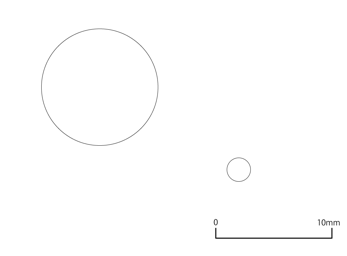

In [16]:
sample_filename = "FewShotVisionImage/sample2.png"
img = Image.open(sample_filename)
img.resize((img.width//3, img.height//3))

In [17]:
with open(sample_filename,"rb") as imagefile:
    sample_b64_string = base64.b64encode(imagefile.read()).decode('utf-8')

In [20]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。丸の直径を右下のスケールから推測してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{sample_b64_string}"}}
          ]
        },
        {"role": "assistant", "content": "この画像には丸が２つ写っています。右下のスケールは10mmのスケールを表しています。このスケールの線の長さを各丸に重ね合わせて比率を導出すると、小さい方の丸は直径が2mm、大きい方の丸は直径が10mmであると推測されます。"},
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。正方形の辺の長さを右下のスケールから推測してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{target_b64_string}"}}
          ]
        },
    ],
    max_tokens=600,
    temperature=0
)

answer = response.choices[0].message.content
print(answer)

この画像には正方形が２つ写っています。右下のスケールは10mmのスケールを表しています。このスケールの線の長さを各正方形の辺に重ね合わせて比率を導出すると、小さい方の正方形は辺の長さが7mm、大きい方の正方形は辺の長さが14mmであると推測されます。
